<a href="https://colab.research.google.com/github/mekaneeky/GoMyCode-Intro2AI-notebooks/blob/main/GMC_AI_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import graphviz
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
!gdown --id 1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc


Downloading...
From: https://drive.google.com/uc?id=1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc
To: /content/titanic-passengers.csv
100% 62.6k/62.6k [00:00<00:00, 38.2MB/s]


In [18]:
titanic_df = pd.read_csv("titanic-passengers.csv", delimiter=";")

In [19]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)

## Since we have 3 values at the same frequency for the most frequent in the cabin
# it is best to fill the 3 values equally. To affect the distribution less
most_frequent_cabin = ["G6", "C23 C25 C27", "B96 B98"]
third_of_passengers = len(titanic_df)//3

titanic_df["Cabin"][:third_of_passengers].fillna(most_frequent_cabin[0], inplace=True)
titanic_df["Cabin"][third_of_passengers:third_of_passengers*2].fillna(most_frequent_cabin[1], inplace=True)
titanic_df["Cabin"][third_of_passengers*2:].fillna(most_frequent_cabin[2], inplace=True)

titanic_df["Embarked"].fillna("S", inplace=True)

passenger_ids = titanic_df["PassengerId"]

titanic_df.drop(columns="Name", inplace=True)
titanic_df.drop(columns="Ticket", inplace=True)
titanic_df.drop(columns="Cabin", inplace=True)



In [20]:

replacement_dict = {"Survived":{"Yes":1, "No":0},
                    "Sex":{"female":1,"male":0}}

try:
    titanic_df.replace(replacement_dict,inplace=True)
except TypeError:
    pass

try:
    one_hot_embarked = pd.get_dummies(titanic_df["Embarked"])
    titanic_df.drop(columns="Embarked", inplace=True)
    titanic_df = titanic_df.join(one_hot_embarked)
except KeyError:
    pass

try:
    one_hot_pclass = pd.get_dummies(titanic_df["Pclass"])
    titanic_df.drop(columns="Pclass", inplace=True)
    titanic_df = titanic_df.join(one_hot_pclass)
except KeyError:
    pass

scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(titanic_df) 
titanic_df.loc[:,:] = scaled_values
titanic_df.drop(columns=["PassengerId"], inplace=True)

In [21]:
titanic_df

,Survived,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,0.0,0.0,0.346569,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.308872,0.000,0.000000,0.014932,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.246042,0.000,0.000000,0.015330,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.359135,0.000,0.666667,0.041136,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.384267,0.125,0.000000,0.101497,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,1.0,0.170646,0.125,0.000000,0.058694,1.0,0.0,0.0,0.0,1.0,0.0
887,0.0,0.0,0.271174,0.000,0.000000,0.014110,1.0,0.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.371701,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,1.0
889,0.0,0.0,0.367921,0.000,0.000000,0.015412,0.0,0.0,1.0,0.0,0.0,1.0


In [22]:
train_df, test_df = train_test_split(titanic_df, test_size=0.20,random_state=42)

x_train = train_df.drop(columns=["Survived"]).values
y_train = train_df["Survived"].values.reshape(-1,1)

x_test = test_df.drop(columns=["Survived"]).values
y_test = test_df["Survived"].values.reshape(-1,1)



In [39]:
#applying tree algorithm
treeclf = DecisionTreeClassifier()  
treeclf.fit(x_train, y_train)   #fitting our model
y_pred=treeclf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

score:0.7486033519553073
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       114
         1.0       0.64      0.69      0.67        65

    accuracy                           0.75       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.75      0.75       179



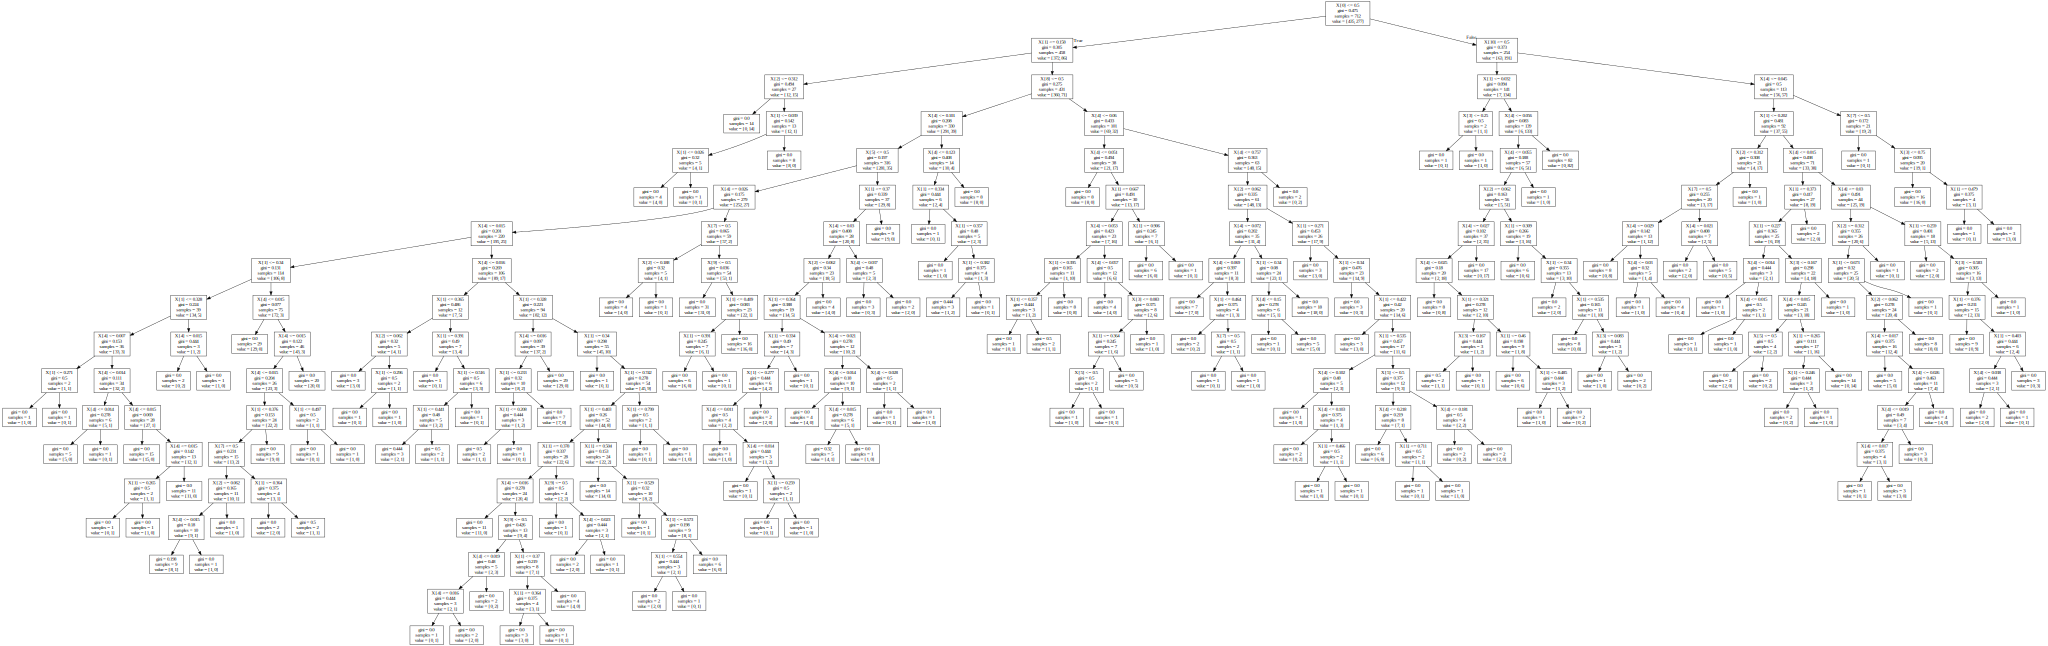

In [41]:
output = tree.export_graphviz(treeclf, out_file=None)
graph = graphviz.Source(output)
graph.render("data")
graph



In [34]:

accuracies = []
for n_estimators in range(1,101):
    clf=RandomForestClassifier(n_estimators=n_estimators)  #Creating a random forest with 100 decision trees
    clf.fit(x_train, y_train)  #Training our model
    y_pred=clf.predict(x_test)  #testing our model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #print("Accuracy:", accuracy)  #Measuring the accuracy of our model
    accuracies.append(accuracy)
    #print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

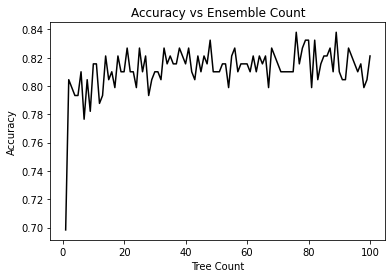

In [32]:
import matplotlib.pyplot as plt

plt.title("Accuracy vs Ensemble Count")
plt.ylabel("Accuracy")
plt.xlabel("Tree Count")
plt.plot([i for i in range(1,101)],accuracies,color="k")
plt.show()